In [325]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from scipy import stats
from ast import literal_eval

movie = pd.read_csv("movies_metadata.csv")
movie.drop(['adult', 'imdb_id', 'belongs_to_collection', 'homepage', 'id', 'original_language', 'original_title', 'overview', 'poster_path', 'production_countries', 'spoken_languages', 'status', 'tagline', 'video', 'production_companies'], axis=1, inplace=True)
movie.head()

,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",21.9469,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",17.0155,1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",11.7129,1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",3.85949,1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0
4,0,"[{'id': 35, 'name': 'Comedy'}]",8.38752,1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0


In [326]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        45466 non-null  object 
 1   genres        45466 non-null  object 
 2   popularity    45461 non-null  object 
 3   release_date  45379 non-null  object 
 4   revenue       45460 non-null  float64
 5   runtime       45203 non-null  float64
 6   title         45460 non-null  object 
 7   vote_average  45460 non-null  float64
 8   vote_count    45460 non-null  float64
dtypes: float64(4), object(5)
memory usage: 3.1+ MB


In [327]:
movie['year'] = pd.to_datetime(movie['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [328]:
movie.head()

,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,year
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",21.9469,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,1995
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",17.0155,1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,1995
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",11.7129,1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0,1995
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",3.85949,1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0,1995
4,0,"[{'id': 35, 'name': 'Comedy'}]",8.38752,1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0,1995


In [329]:
movie['genre'] = movie['genres'].apply(literal_eval)\
                        .apply(lambda x: [e['name'] for e in x] if isinstance(x,list) else [])

In [330]:
movie.head()

,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,year,genre
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",21.9469,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,1995,"[Animation, Comedy, Family]"
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",17.0155,1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,1995,"[Adventure, Fantasy, Family]"
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",11.7129,1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0,1995,"[Romance, Comedy]"
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",3.85949,1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0,1995,"[Comedy, Drama, Romance]"
4,0,"[{'id': 35, 'name': 'Comedy'}]",8.38752,1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0,1995,[Comedy]


In [331]:
glist = eval(movie.iloc[0].genres)
glist[0]['name']


'Animation'

In [334]:
movie.head()

,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,year,genre
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",21.9469,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,1995,"[Animation, Comedy, Family]"
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",17.0155,1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,1995,"[Adventure, Fantasy, Family]"
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",11.7129,1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0,1995,"[Romance, Comedy]"
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",3.85949,1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0,1995,"[Comedy, Drama, Romance]"
4,0,"[{'id': 35, 'name': 'Comedy'}]",8.38752,1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0,1995,[Comedy]


In [333]:
movie.to_csv('movie2.csv')

In [344]:
np.mean(movie.runtime)

94.12819945578833


In [352]:
runtimemean = movie.groupby(movie.year)['runtime'].transform('mean')

In [353]:
print(runtimemean)

0        96.899833
1        96.899833
2        96.899833
3        96.899833
4        96.899833
           ...    
45461    61.068493
45462    93.236921
45463    97.402509
45464    51.705882
45465    93.740952
Name: runtime, Length: 45466, dtype: float64


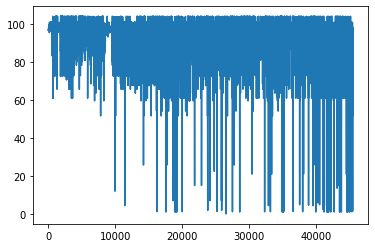

In [357]:
import matplotlib.pyplot as plt
plt.plot(runtimemean)